In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
csv_path = Path("/Users/miguela.olmos/Desktop/Challenge_20/Resources/lending_data.csv")

lending_df = pd.read_csv(csv_path)

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train,X_test,y_train,y_test)

       loan_size  interest_rate  borrower_income  debt_to_income  \
29175     8600.0          6.792            44500        0.325843   
23020     7800.0          6.419            41000        0.268293   
31269    10000.0          7.386            50100        0.401198   
35479     9300.0          7.093            47300        0.365751   
13470     9200.0          7.045            46900        0.360341   
...          ...            ...              ...             ...   
20609     7200.0          6.177            38700        0.224806   
21440    10000.0          7.389            50100        0.401198   
73349    10200.0          7.463            50800        0.409449   
50057    11100.0          7.838            54400        0.448529   
5192     10600.0          7.632            52400        0.427481   

       num_of_accounts  derogatory_marks  total_debt  
29175                3                 0       14500  
23020                2                 0       11000  
31269             

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train, y_train)

logistic_model

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
predictions = logistic_model.predict(X_test)

print(predictions)

[0 0 0 ... 0 0 0]


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Generate a confusion matrix for the model
confusion_matrix_result = confusion_matrix(y_test, predictions)

print(confusion_matrix_result)

[[18655   110]
 [   36   583]]


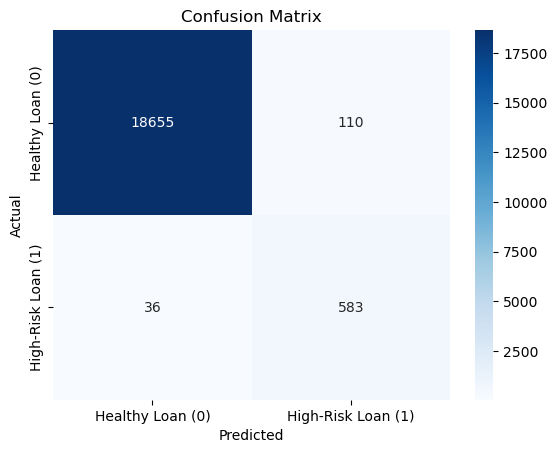

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'],
            yticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Print the classification report for the model
classification_report = classification_report(y_test, predictions)

print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** For the 0 that are the (healthy loans ) having 0.99 in recall means that the model identified 99% of all 0 (or healthy loans) , for the 1 that are the (high risk loans) having 0.94 in recall means that the model identified 94% of all 0 (or high risk loans) also considering that the precision of 84% means that 16% was considered as a false positive and that could mean some healthy loans were classified as high risk instead.

---